Google Stock Price Prediction model
                                                                              


---


> Project By - Anurag Patil





---

#Project Problem
We are given Google stock price from 01/2012 to 12/2016. The task is to predict the trend of the stock price for 01/2017 and compare with the real stock price of year 2017

## **1. Importing Libraries**

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings 
import math
warnings.filterwarnings("ignore")

 

# 2.  **Data processing**

 **2.1. Importing data**

In [5]:
data_train=pd.read_csv("Google_Stock_Price_Train.csv")

In [6]:
data_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [8]:
from datetime import datetime
data_train['Date'] = pd.to_datetime(data_train.Date,format='%m/%d/%Y')
data_train.index = data_train['Date']

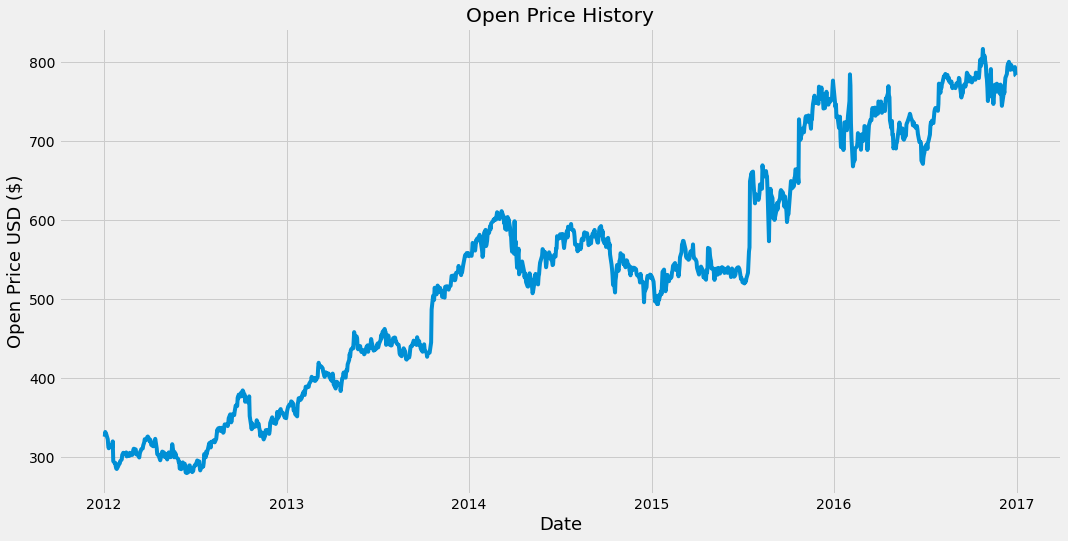

In [9]:
plt.figure(figsize=(16,8))
plt.title('Open Price History')
plt.plot(data_train['Open'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize= 18)
plt.show()

In [10]:
train=data_train.loc[:,["Open"]].values
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

2.2 Feature scaling - Normalization

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train_scaled=scaler.fit_transform(train)
train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

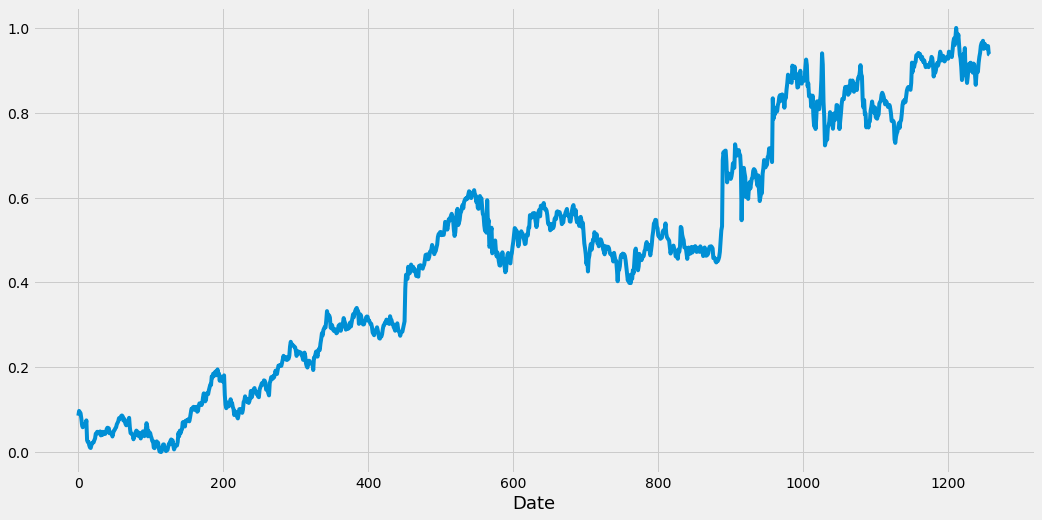

In [12]:
plt.figure(figsize=(16,8))
plt.plot(train_scaled)
plt.xlabel('Date', fontsize=18)
plt.show()

2.3 Data structure creation

In [13]:
#creating data structure
X_train=[]
y_train=[]
timesteps=50
for i in range(timesteps,1258):
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

2.4 Data reshaping

In [14]:
#reshape
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.03675869],
        [0.04486941],
        [0.05065481]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.04486941],
        [0.05065481],
        [0.05214302]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.05065481],
        [0.05214302],
        [0.05612397]],

       ...,

       [[0.9313937 ],
        [0.94636878],
        [0.96569685],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.94636878],
        [0.96569685],
        [0.97510976],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.96569685],
        [0.97510976],
        [0.95966962],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [15]:
y_train

array([0.05214302, 0.05612397, 0.05818885, ..., 0.95725128, 0.93796041,
       0.93688146])

# **3. Model building**

In [16]:
# importing keras libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

regressor=Sequential()

#adding first rnn layer
regressor.add(SimpleRNN(units=50,activation="tanh",return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

#adding second rnn layer
regressor.add(SimpleRNN(units=50,activation='tanh',return_sequences=True))
regressor.add(Dropout(0.2))

#adding third rnn layer 
regressor.add(SimpleRNN(units=50,activation='tanh',return_sequences=True))
regressor.add(Dropout(0.2))

#adding fourth rnn layer
regressor.add(SimpleRNN(units=50))
regressor.add(Dropout(0.2))

#adding the output layer 
regressor.add(Dense(units=1))

#compiling the rnn
regressor.compile(optimizer="adam",loss="mean_squared_error")

#fitting the rnn to the training set
regressor.fit(X_train,y_train,epochs=100,batch_size=32)


Epoch 1/100
38/38 [==============================] - 26s 43ms/step - loss: 0.5773
Epoch 2/100
38/38 [==============================] - 2s 43ms/step - loss: 0.2265
Epoch 3/100
38/38 [==============================] - 2s 43ms/step - loss: 0.1436
Epoch 4/100
38/38 [==============================] - 2s 43ms/step - loss: 0.1140
Epoch 5/100
38/38 [==============================] - 2s 42ms/step - loss: 0.0860
Epoch 6/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0679
Epoch 7/100
38/38 [==============================] - 2s 42ms/step - loss: 0.0624
Epoch 8/100
38/38 [==============================] - 2s 42ms/step - loss: 0.0496
Epoch 9/100
38/38 [==============================] - 2s 42ms/step - loss: 0.0392
Epoch 10/100
38/38 [==============================] - 2s 42ms/step - loss: 0.0336
Epoch 11/100
38/38 [==============================] - 2s 42ms/step - loss: 0.0319
Epoch 12/100
38/38 [==============================] - 2s 42ms/step - loss: 0.0289
Epoch 13/100
38/38 [====

In [17]:
data_test=pd.read_csv("Google_Stock_Price_Test.csv")
data_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [18]:
real_stock_price=data_test.loc[:,["Open"]].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [19]:
data_total=pd.concat((data_train['Open'],data_test['Open']),axis=0)
inputs=data_total[len(data_total)-len(data_test)-timesteps:].values.reshape(-1,1)
inputs=scaler.transform(inputs) # min max scaler
inputs

array([[0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.95762334],
       [0.96413424],
       [0.96402262],
       [0.96971501],
       [0.95077759],
       [0.96294367],
       [0.96123223],
       [0.95475854],
       [0.95204256],
       [0.95163331],
       [0.957

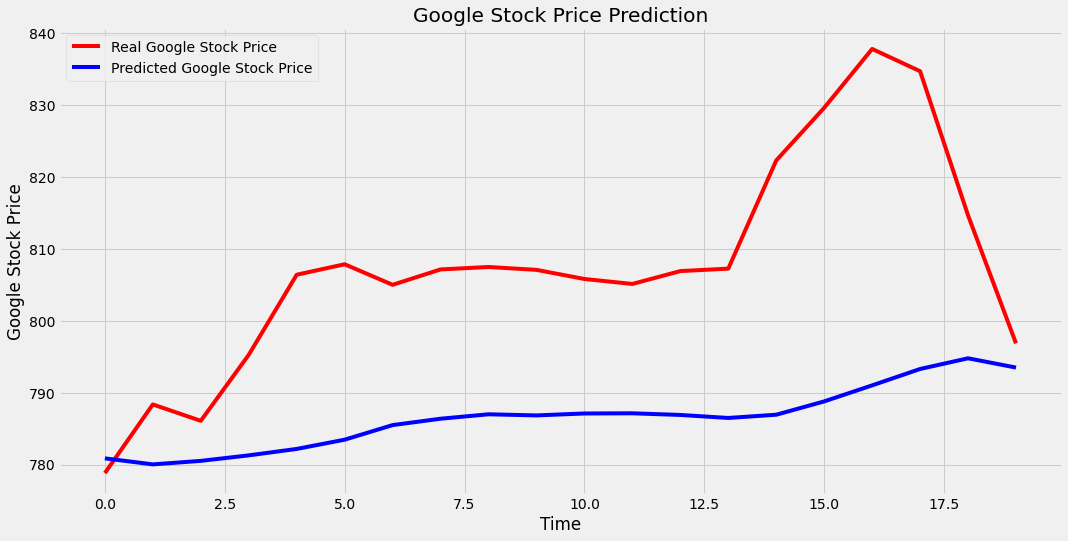

In [20]:
X_test = []
for i in range(timesteps, 70):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)



#visualising the results
plt.figure(figsize=(16,8))
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


In [21]:
import math 
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error

In [22]:
data_train.head()

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2012-01-03,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


## **4. Model prediction**

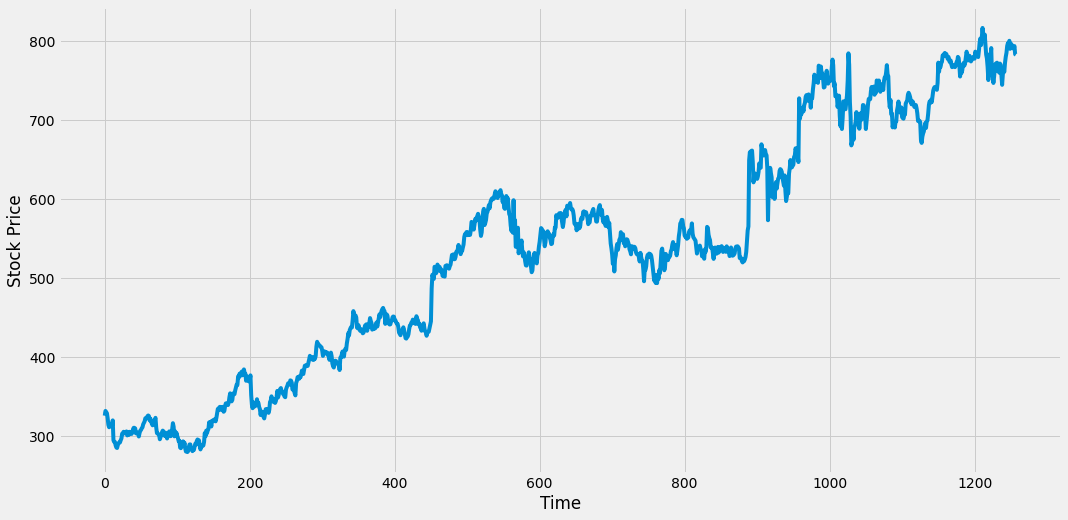

In [23]:

train=data_train.iloc[:,1].values
plt.figure(figsize=(16,8))
plt.plot(train)
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.show()

In [24]:
#model
model=Sequential()
model.add(LSTM(60,input_shape=(X_train.shape[1],1)))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")
model.fit(X_train,y_train,epochs=15,batch_size=1)

Epoch 1/15
1208/1208 [==============================] - 15s 10ms/step - loss: 0.0091
Epoch 2/15
1208/1208 [==============================] - 12s 10ms/step - loss: 9.0869e-04
Epoch 3/15
1208/1208 [==============================] - 12s 10ms/step - loss: 8.8650e-04
Epoch 4/15
1208/1208 [==============================] - 12s 10ms/step - loss: 5.4032e-04
Epoch 5/15
1208/1208 [==============================] - 12s 10ms/step - loss: 5.2773e-04
Epoch 6/15
1208/1208 [==============================] - 12s 10ms/step - loss: 4.6351e-04
Epoch 7/15
1208/1208 [==============================] - 12s 10ms/step - loss: 3.8135e-04
Epoch 8/15
1208/1208 [==============================] - 12s 10ms/step - loss: 3.5063e-04
Epoch 9/15
1208/1208 [==============================] - 12s 10ms/step - loss: 3.8380e-04
Epoch 10/15
1208/1208 [==============================] - 12s 10ms/step - loss: 3.1919e-04
Epoch 11/15
1208/1208 [==============================] - 12s 10ms/step - loss: 3.5655e-04
Epoch 12/15
1208/1208 [

In [25]:
trainPredict=model.predict(X_train)
testPredict=model.predict(X_test)

trainPredict=scaler.inverse_transform(trainPredict)
trainY=scaler.inverse_transform([y_train])
testPredict=scaler.inverse_transform(testPredict)

trainScore=math.sqrt(mean_squared_error(trainY[0],trainPredict[:,0]))
print("Train Score: %.2f RMSE" % (trainScore))

Train Score: 9.19 RMSE


#  5. Result visualization





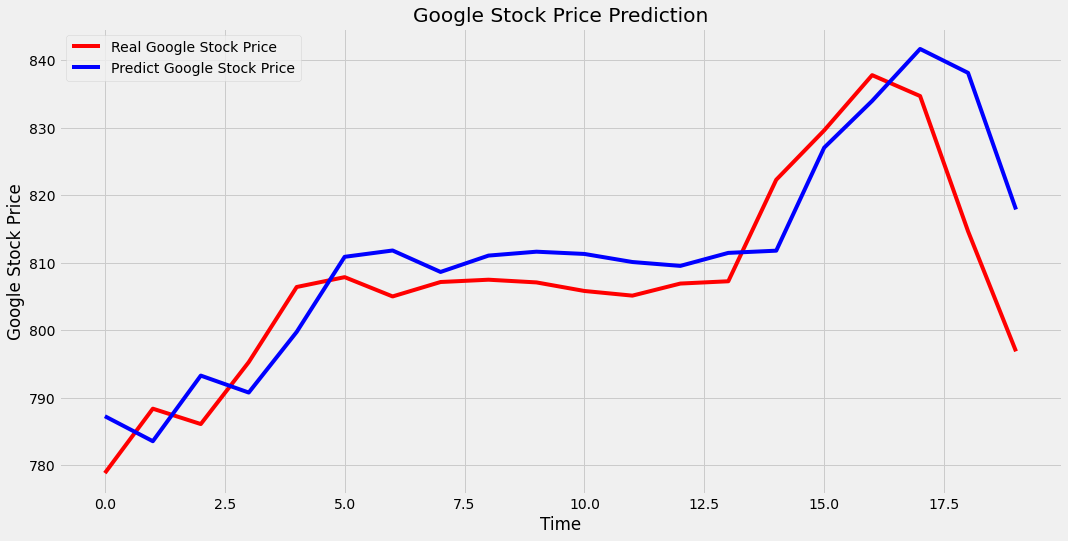

In [26]:
plt.figure(figsize=(16,8))
plt.plot(real_stock_price,color="red",label="Real Google Stock Price")
plt.plot(testPredict,color="blue",label="Predict Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time"),
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()